## 신경망 학습의 지표는 손실함수
왜 신경망 학습의 지표가 정확도가 아닌 손실함수인가? - 신경망 학습에서의 미분의 역할이 그 이유.  

신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾는다.  
이때 매개변수의 미분을 계산하고 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

즉, 가중치 매개변수의 손실 함수의 미분이란 가중치 매개변수의 값을 아주 조금 변화시켰을 때 손실 함수가 어떻게 변하는지를 보는 것.  

정확도가 지표가 되었을 경우, 100장의 훈련 데이터 중 32장을 올바르게 인식한다고 가정하면 정확도는 32%이다.  
가중치 매개변수의 값을 조정해도 32.0123%와 같은 연속적인 변화가 아니라 33% 34%처럼 불연속적인 띄엄띄엄한 값으로 바뀐다.

## 미분

마라톤 선수가 10분에 2km씩 달렸다. 이때의 속도는 간단하게 2/ 10 = 0.2km라고 계산할 수 있다.(1분에 0.2km만큼의 속도)  
다만 10분에 2km를 뛰었다는 것은, 10분 동안의 평균 속도를 구한 것이다.

따라서 미분이라는 특정 순간의 변화량을 구해야 하는데, 이는 10분이라는 시간을 가능한 한 줄여 한 순간의 변화량을 얻는 것.
<img src="img/deep_learning_images/e_4.4.png" width=320 height=320>

좌변은 $f(x)$의 $x$에 대한 미분으로, $x$의 작은 변화가 함수 $f(x)$를 얼마나 변화시키는가를 의미한다.  
이때 시간을 뜻하는 $h$를 한없이 0에 가깝게 한다는 의미로 $\displaystyle\lim_{h->0}$ 로 나타낸다.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 수치 미분(numerical differentiation)
def bad_numerical_diff(f, x):
    # h = 10e-50
    h = 1e-4
    return (f(x+h) - f(x)) / h

위 구현에서 h에 가능한 최소한의 값을 대입하고 싶어서 ```10e-50```이라는 값을 적용하려하나, 이는 반올림 오차 문제를 일으킨다.  
반올림 오차는 작은 값(예를 들면 소수점 8자리 이하)은 생략되기 때문이다.

In [3]:
print(np.float64(1e-50))
print(np.float32(1e-50))

1e-50
0.0


또한 진정한 미분은 $x$위치의 함수의 기울기에 해당하지만 위 수식의 미분은 $(x+h)$와 $x$사이의 기울기에 해당한다.  
그래서 진정한 미분과 이번 구현의 값은 엄밀히 따지면 일치하지 않는다. dlsms h를 무한히 0으로 좁히지 못하기 때문에 생기는 한계이다.
<img src="img/deep_learning_images/fig_4-5.png" height=320 width=320>

따라서 다음과 같이 구현이 개선된다.

아래와 같이 $x$를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심 차분 혹은 중앙 차분이라한다.  
> 아주 작은 차분으로 미분하는 것을 수치 미분이라한다.

$(x+h)와 x$의 차분은 전방 차분.
> 수식을 전개해 미분하는 것(우리가 학생 때 배웠던 미분)은 해석적 해, 해석적 미분(위에서 언급한 진정한 미분) 이라 한다.

In [4]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

식 $y=0.01x^2+0.1x$을 미분해서 확인해보자. 일단 수학 수업시간에 배운 미분을 적용했을 때 결과는 $0.02x+0.1$.  
$x=5$라고 하면 결과 값은 0.2.

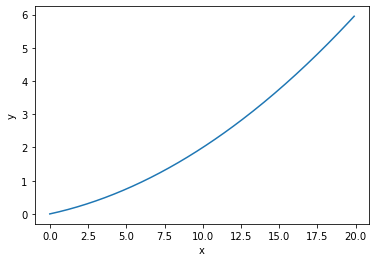

In [5]:
def func_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = func_1(x)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [6]:
print("해석적 미분 값 : ", bad_numerical_diff(func_1, 5))
print("수치 미분 값 : ", numerical_diff(func_1, 5))

해석적 미분 값 :  0.20000099999917254
수치 미분 값 :  0.1999999999990898


결과로 보면 해석적 미분 값은 0.2를 넘었다고 볼 수 있고, 수치 미분 값은 0.2에 한없이 가깝기에 0.2로 볼 수 있다.  
위에서 말한 h가 0에 한없이 가까움을 구현하는 한계가 있기 때문에 발생하는 오차라고 볼 수 있다.

## 편미분

$f(x_0, x_1) = x_0^2 + x_1^2$

In [7]:
def func_2(x):
    return x[0]**2 + x[1] ** 2

위 식에서 미분을 하려고 하는데, 어떤 변수에 대한 미분인가??  
우선은 주어진 식처럼 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다.
$\frac{\partial f}{\partial x_0}$ $\frac{\partial f}{\partial x_1}$

예제 1. $x_0$=3, $x_1$=4 일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$를 구하라

In [8]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

예제 2. $x_0=3, x_1=4$일 때, $x_1$에 대한 편미분 $\frac {\partial f}{\partial x_1}$를 구하라

In [9]:
def function_tmp2(x1):
    return 3.0**2.0 + x1 * x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

위 예제에서 볼 수 있듯, 편미분은 여러 변수 중 하나에 초점을 맞추고 다른 변수는 값을 고정한다.

## 편미분을 동시에 계산할 수 없는가?

$x_0=3, x_1=4$일 때, $(x_0, x_1)$ 두 변수의 편미분을 묶어서 $(\frac {\partial f}{\partial x_0}, \frac {\partial f}{\partial x_1})$을 계산한다고 할 때, 모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 한다. 

In [10]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
#     print(x.shape, grad.shape)
    
#     print(x.size)
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
        
    return grad

numerical_gradient(f,x) 함수의 인수인 f는 함수이고, x는 넘파이 배열이므로,  
넘파이 배열 x의 각 원소에 대해서 수치 미분을 구한다. 예를 들어 세 점(3, 4), (0, 2), (3, 0)에서의 기울기를 구한다고 하면,

In [11]:
print(numerical_gradient(func_2, np.array([3.0, 4.0])))
print(numerical_gradient(func_2, np.array([0, 2.0])))
print(numerical_gradient(func_2, np.array([3.0, 0])))

[6. 8.]
[0. 4.]
[6. 0.]


점 (3, 4)의 기울기는 (6, 8). 점 (0, 2)의 기울기는 (0, 4)... 그렇다면
기울기가 의미하는 것은 무엇인가?

In [12]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)

print(x0) # start : -2, end : 2.5 step : 0.25

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25]


In [13]:
X, Y = np.meshgrid(x0, x1)
print(X.shape)
print(X)

(18, 18)
[[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25  1.5   1.75  2.    2.25]
 [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
   1.    1.25

In [14]:
X = X.flatten()
Y = Y.flatten()
print(X.shape)
print(X)

(324,)
[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -

In [15]:
def function_2(x):    
    if x.ndim == 1:
        return np.sum(x**2)
        
    else:
        return np.sum(x**2, axis=1)        

In [16]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

def numerical_gradient(f, X):    
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [17]:
grad = numerical_gradient(function_2, np.array([X, Y]))

No handles with labels found to put in legend.


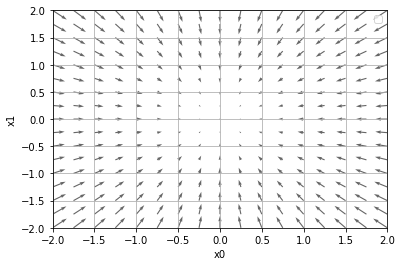

In [18]:
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

기울기를 방향을 가진 벡터(화살표)로 그려본 그림이다. 즉 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.